In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Compute Residuals 

In [ ]:
groups = ['SB', 'SD', 'MB', 'MD']

for i in groups:
  pred = pd.read_pickle('/content/drive/MyDrive/Stanford-TUBerlin/CodePaper/RegressionModel/pred_{}'.format(i))
  prediction = pred[['q0.1', 'q0.2', 'q0.5', 'q0.8', 'q0.9']]
  residual = prediction.sub(pred['y_true'], axis=0)*-1
  residual.to_pickle('/content/drive/MyDrive/Stanford-TUBerlin/CodePaper/Residuals/residual_{}'.format(i))


SB
SD
MB
MD


In [ ]:
residual = pd.read_pickle('/content/drive/MyDrive/Stanford-TUBerlin/CodePaper/Residuals/residual_SB')

In [ ]:
idx  = residual.index[:9]
date = pd.date_range(start='1/1/2008', end='7/1/2020', freq='2MS')

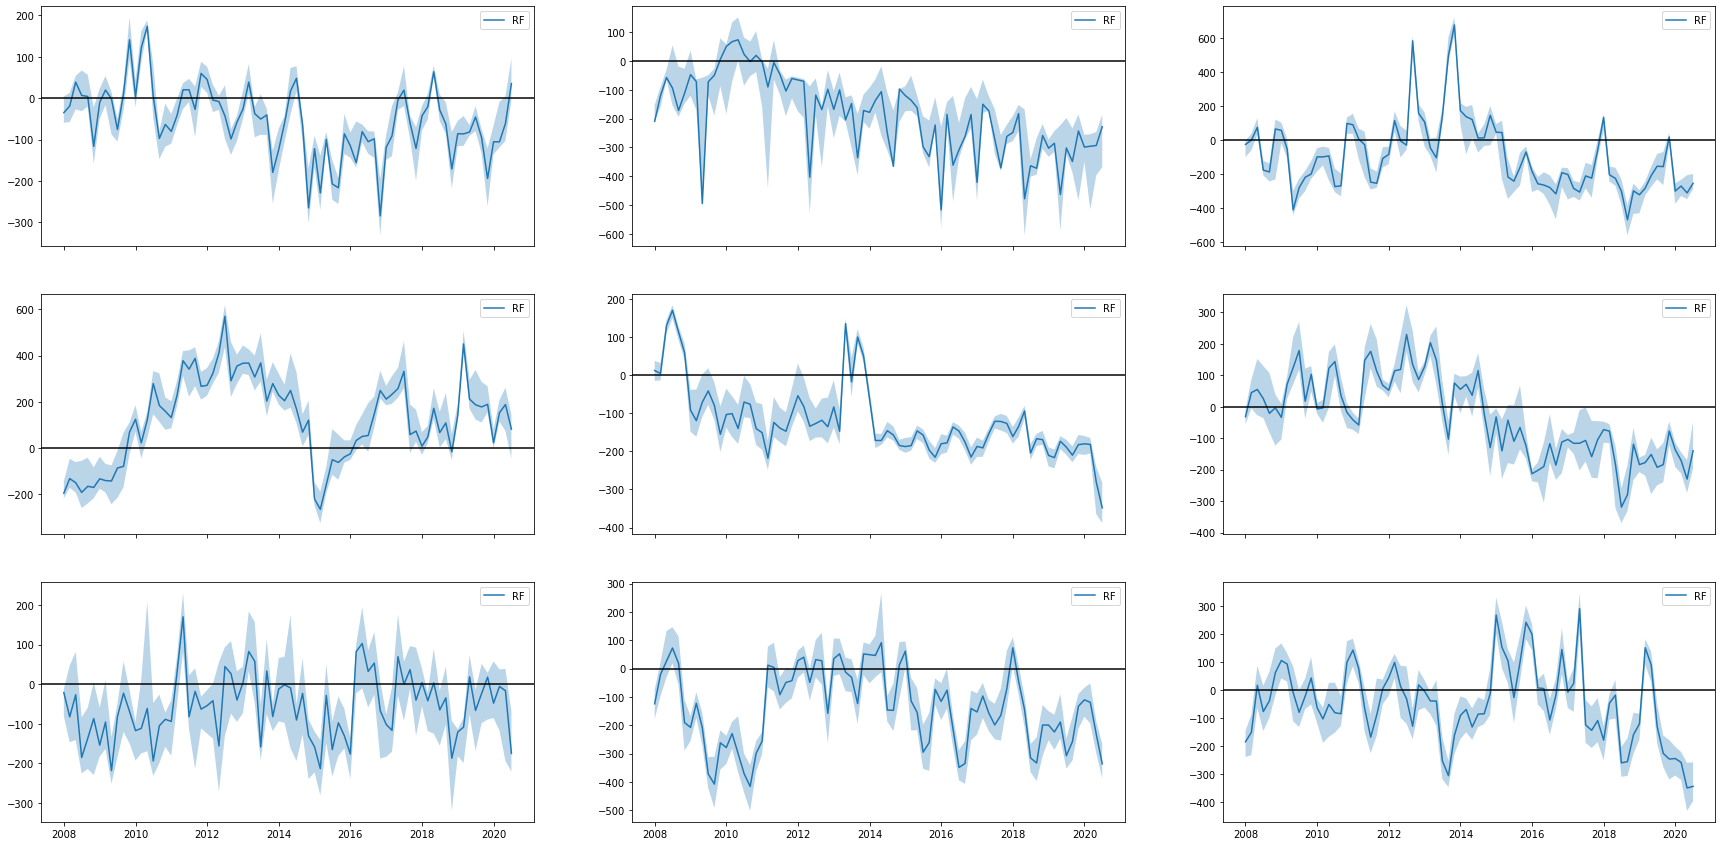

In [ ]:
fig, ax  = plt.subplots(3,3, sharex=True, figsize=(30,15))
i=0
for row in ax:
  for col in row:
    index = idx[i]
    col.plot( date, residual['q0.5'].loc[index], label='RF')
    col.axhline(y=0, color='k')
    col.fill_between(date, residual['q0.2'].loc[index],  residual['q0.8'].loc[index], alpha=0.3 )
    col.legend()
    i += 1

# Compute Behaviour Pattern

In [ ]:
residual = pd.read_pickle('/content/drive/MyDrive/Stanford-TUBerlin/CodePaper/Residuals/residual_SB')
# initialize pattern matrix
pattern_SB = pd.DataFrame(index=residual.index, columns=['pattern', 'abc'])

for k, row in residual.iterrows():
  #print(row['q0.2'])
  upper = row['q0.2']
  lower = row['q0.8']
  pattern = np.zeros(76)
  for i in range(len(pattern)):
    if upper[i] < 0:
      pattern[i] = -1
    elif lower[i] > 0:
      pattern[i] = 1
  pattern_SB.loc[k] = (pattern, 0)




/usr/local/lib/python3.7/dist-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)


In [ ]:
pattern_SB = pattern_SB.drop(columns=['abc'])
pattern_SB.to_pickle('/content/drive/MyDrive/Stanford-TUBerlin/CodePaper/Residuals/pattern_SB')

In [ ]:
pattern_SB

,pattern
W_LocationID,
MW10002,"[-1.0, -1.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0,..."
MW10003,"[1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1..."
MW10006,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
MW10007,"[-1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
MW10008,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0,..."
...,...
MW9989,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, -1.0, -1.0, -1...."
MW9990,"[-1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1...."
MW9991,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1...."
